In [1]:
# Mount on drive if using colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/ECE219/Project_4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ECE219/Project_4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Training

### Linear Regression

In [3]:
## Reload preprocessed standardized training datasets
bike_selected_train_df = pd.read_csv('data_train/bike_selected_train_df.csv')
bike_selected_train_df = bike_selected_train_df.drop(['Unnamed: 0'], axis=1)
suicide_selected_train_df = pd.read_csv('data_train/suicide_selected_train_df.csv')
suicide_selected_train_df = suicide_selected_train_df.drop(['Unnamed: 0'], axis=1)
video_selected_train_df = pd.read_csv('data_train/video_selected_train_df.csv')
video_selected_train_df = video_selected_train_df.drop(['Unnamed: 0'], axis=1)

print("After preprocessing, shape of bike dataset:\t", bike_selected_train_df.shape, "\tFeature num=", bike_selected_train_df.shape[1]-1)
print("After preprocessing, shape of suicide dataset:\t", suicide_selected_train_df.shape, "\tFeature num=", suicide_selected_train_df.shape[1]-1)
print("After preprocessing, shape of video dataset:\t", video_selected_train_df.shape, "\tFeature num=", video_selected_train_df.shape[1]-1)

After preprocessing, shape of bike dataset:	 (731, 6) 	Feature num= 5
After preprocessing, shape of suicide dataset:	 (27820, 5) 	Feature num= 4
After preprocessing, shape of video dataset:	 (68784, 8) 	Feature num= 7


In [4]:
X_bike = bike_selected_train_df.iloc[:,:-1]
y_bike = bike_selected_train_df.iloc[:,-1]
X_suicide = suicide_selected_train_df.iloc[:,:-1]
y_suicide = suicide_selected_train_df.iloc[:,-1]
X_video = video_selected_train_df.iloc[:,:-1]
y_video = video_selected_train_df.iloc[:,-1]

### 3.2.3 Neural Network

#### Bike dataset

In [98]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def mlp_model(X, Y, transform = False):
  if transform:
    Y = np.log(Y)

  estimator=MLPRegressor()


  param_grid = {'hidden_layer_sizes': [(64, 64, 64), (50,100,50), (128,1)],
            'activation': ['identity'],
            'alpha': [0.0001, 0.001, 0.01, 0.05]
            }

  gsc = GridSearchCV(
      estimator,
      param_grid,
      cv=5, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)

  grid_result = gsc.fit(X, Y)


  best_params = grid_result.best_params_

  best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
              
                          activation =best_params["activation"],

                          alpha = best_params["alpha"],
                          
                          max_iter= 5000, n_iter_no_change = 200
                )
  
  print(best_params)
  

  score = cross_validate(LinearRegression(), X, Y, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=10, return_train_score=True)
  print("Train RMSE:", -score['train_score'].mean())
  print("Test RMSE:", -score['test_score'].mean())

  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size= 0.2)
  best_mlp  = best_mlp.fit(X_train, y_train)
  y_pred=best_mlp.predict(X_test)
  residuals = np.subtract(y_test, y_pred)

  print("The Score with R^2 is ", (r2_score(y_pred, y_test)))  

  # plot fitted values vs true values
  plt.figure(figsize=(15,9))
  plt.scatter(y_test, y_pred, color='deeppink', edgecolors='k')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  plt.ylabel('Fitted Value', fontsize = 18)
  plt.xlabel('True Value', fontsize = 18)
  plt.title('Fitted Values vs True Values (Neural Network Regression)', fontsize = 23)
  plt.show()


  # plot residuals vs fitted values
  plt.figure(figsize=(15,9))
  plt.scatter(y_test, residuals, color='deeppink', edgecolors='k')
  plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=4)
  plt.ylabel('Residuals', fontsize = 18)
  plt.xlabel('Fitted Value', fontsize = 18)
  plt.title('Residuals vs Fitted Values (Neural Network Regression)', fontsize = 23)
  plt.show()


{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50)}
Train RMSE: 0.4679497183718856
Test RMSE: 0.5020404975816651
The Score with R^2 is  0.7960284616227926


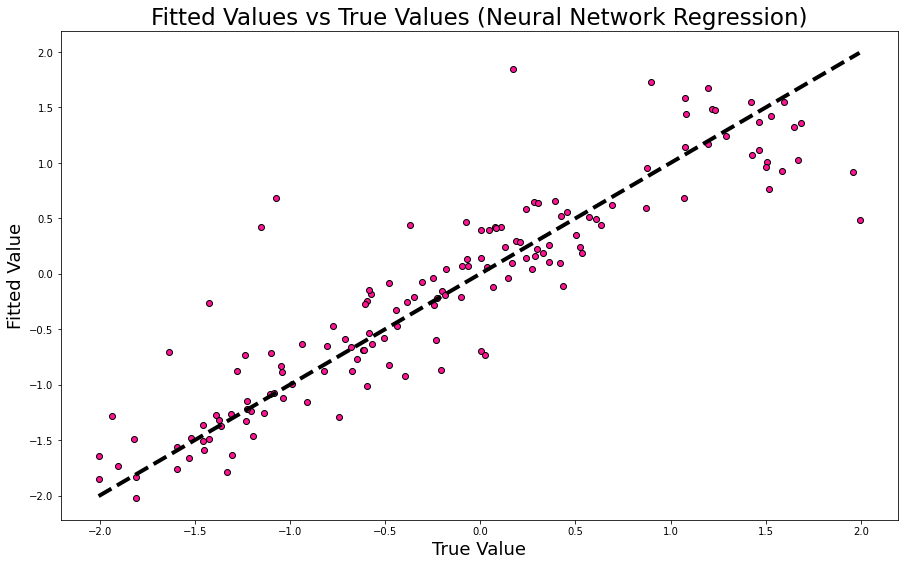

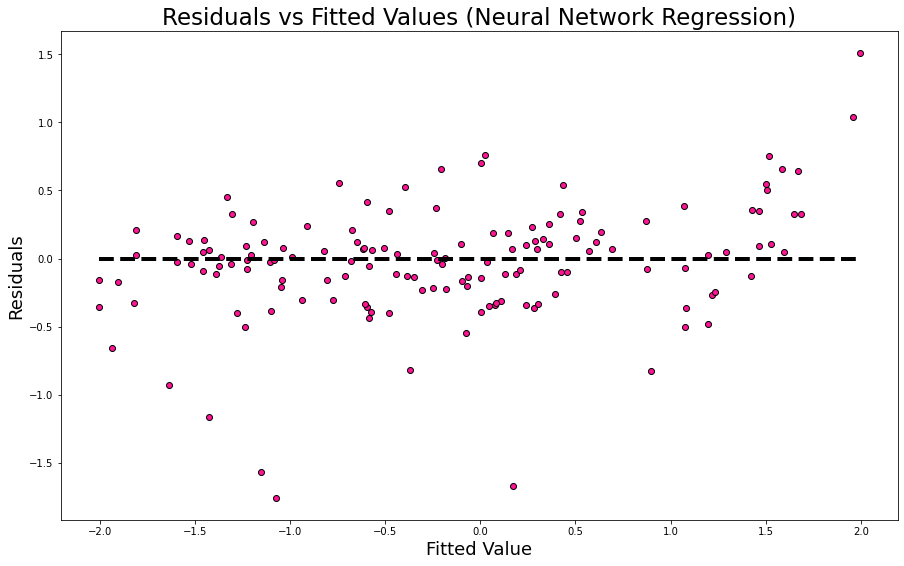

In [ ]:
mlp_model(X_bike, y_bike)

#### Suicide

{'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50)}
Train RMSE: 0.8939885156458521
Test RMSE: 0.886760519452195
The Score with R^2 is  -2.6846176821573704


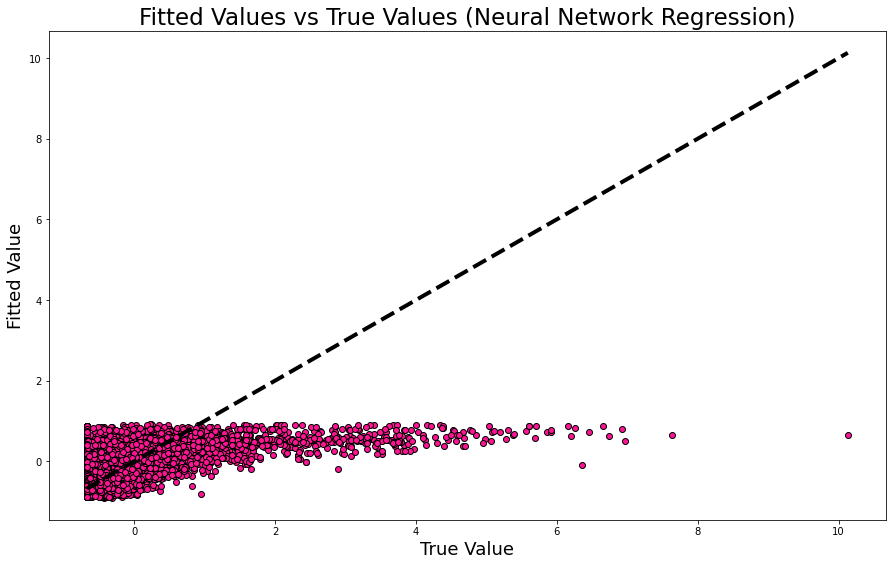

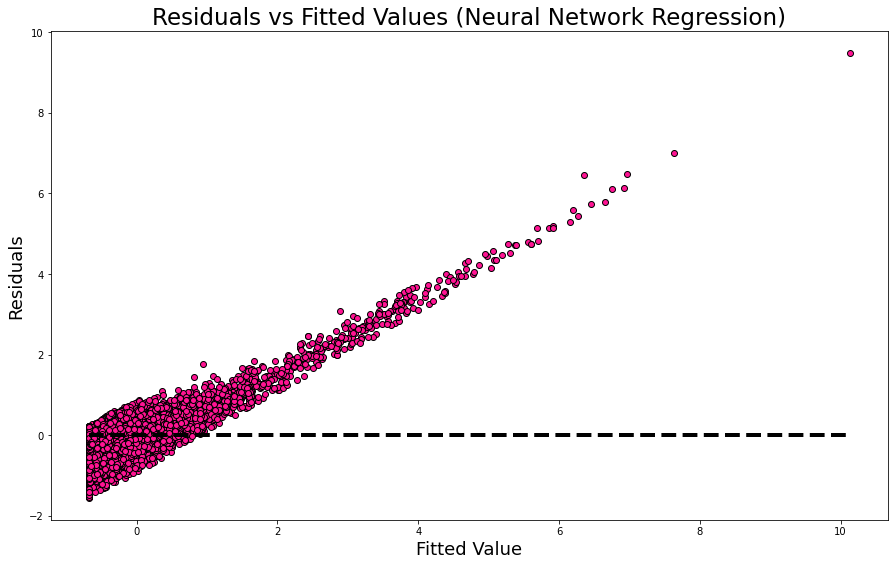

In [ ]:
mlp_model(X_suicide, y_suicide)

#### Video

{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (64, 64, 64)}
Train RMSE: 0.8164504087344966
Test RMSE: 0.8158773907242777
The Score with R^2 is  -0.9568103660823393


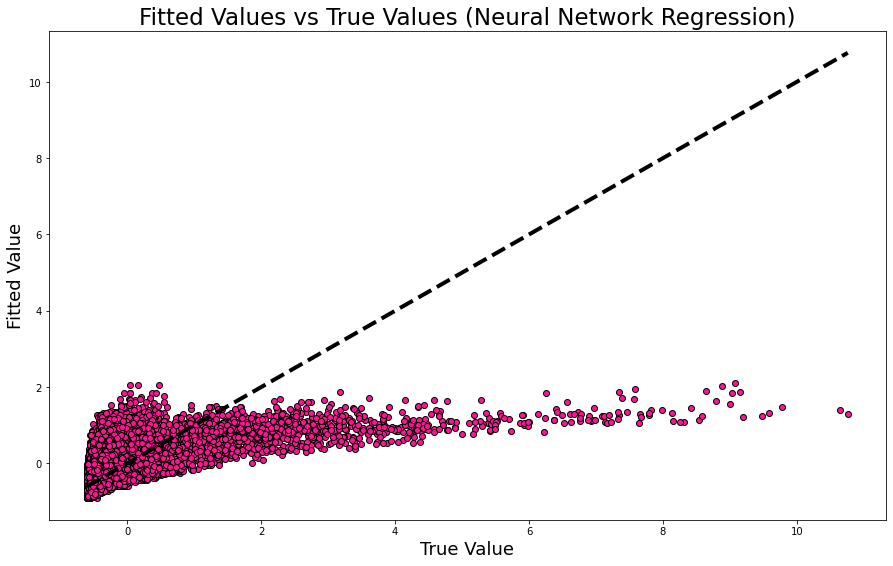

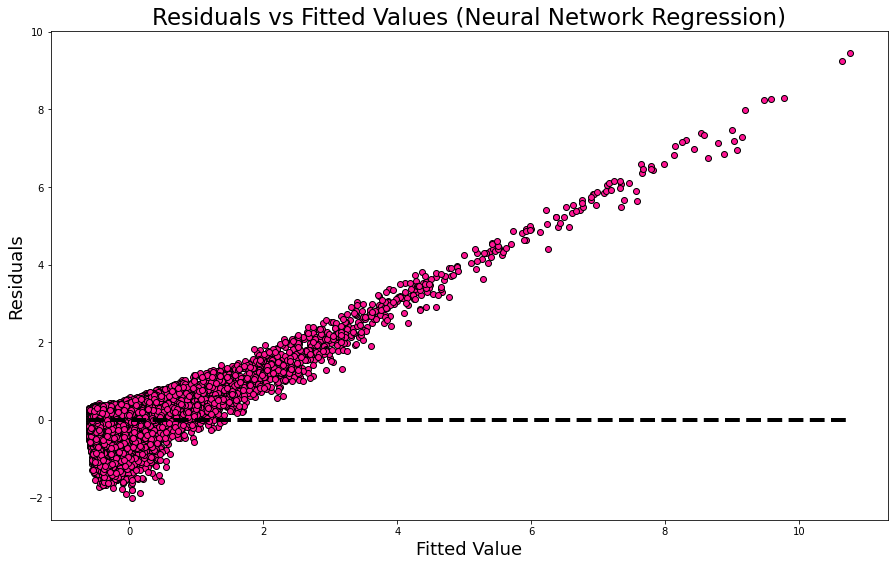

In [ ]:
mlp_model(X_video, y_video)

### 3.2.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_model(X, Y):
  
  # Create a based model
  rf = RandomForestRegressor()


  # Create the parameter grid based on the results of random search 
  param_grid = {

      'max_depth': [80, 90, 100, 110],
      'max_features': [2, 3, 5],
      
      'n_estimators': [100, 200, 300, 1000]
  }
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, scoring= 'neg_root_mean_squared_error', verbose=0, n_jobs=-1)


  grid_result = grid_search.fit(X, Y)


  best_params = grid_result.best_params_

  best_mlp = RandomForestRegressor(max_depth = best_params["max_depth"], 
              
                          max_features =best_params["max_features"],

                          n_estimators = best_params["n_estimators"],
                           oob_score=True
                          
                )
  
  print(best_params)
  

  score = cross_validate(rf, X, Y, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=10, return_train_score=True)
  print("Train RMSE:", -score['train_score'].mean())
  print("Test RMSE:", -score['test_score'].mean())

  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size= 0.2)
  best_mlp  = best_mlp.fit(X_train, y_train)
  y_pred=best_mlp.predict(X_test)
  residuals = np.subtract(y_test, y_pred)
  
  print('Out of Bag error: ' + str(best_mlp.oob_score_))
  print("The R^2 value is ", (r2_score(y_pred, y_test)))  

  # plot fitted values vs true values
  plt.figure(figsize=(15,9))
  plt.scatter(y_test, y_pred, color='deeppink', edgecolors='k')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  plt.ylabel('Fitted Value', fontsize = 18)
  plt.xlabel('True Value', fontsize = 18)
  plt.title('Fitted Values vs True Values (Neural Network Regression)', fontsize = 23)
  plt.show()


  # plot residuals vs fitted values
  plt.figure(figsize=(15,9))
  plt.scatter(y_test, residuals, color='deeppink', edgecolors='k')
  plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=4)
  plt.ylabel('Residuals', fontsize = 18)
  plt.xlabel('Fitted Value', fontsize = 18)
  plt.title('Residuals vs Fitted Values (Random Forest Regression)', fontsize = 23)
  plt.show()


{'max_depth': 90, 'max_features': 3, 'n_estimators': 1000}
Train RMSE: 0.15336152720713428
Test RMSE: 0.49570971437108086
Out of Bag error: 0.8180293465398305
The R^2 value is  0.8550685513583819


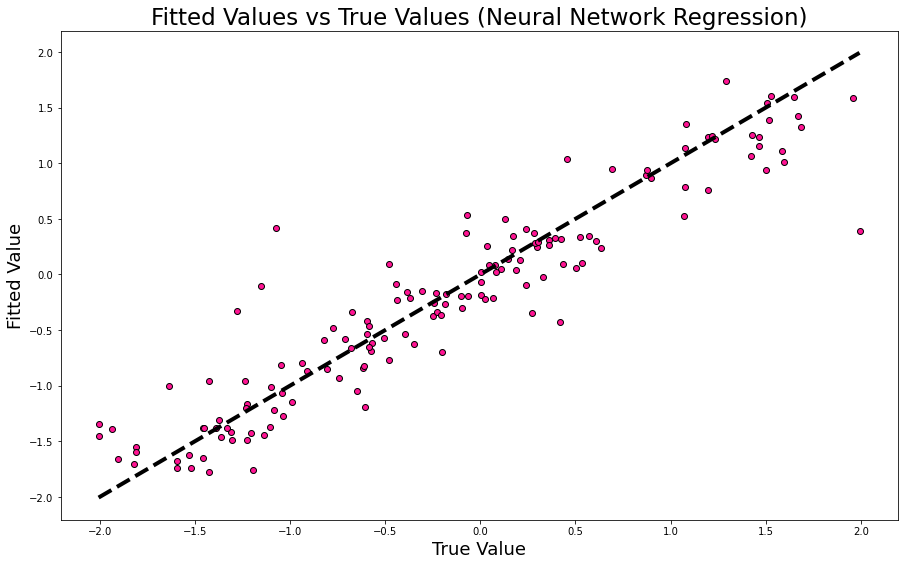

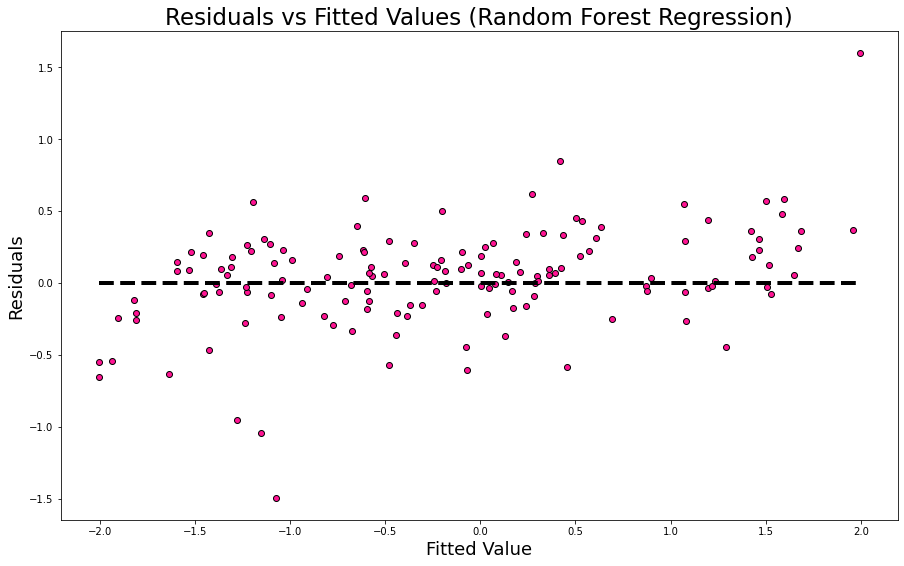

In [ ]:
random_forest_model(X_bike, y_bike)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz 

# visualize the random forest
forest1 =  RandomForestRegressor(oob_score=True, n_estimators=1000,max_features=3,max_depth=4,random_state=42)

forest1.fit(X_bike, y_bike)
tree1 = forest1.estimators_[1]
dot_data = export_graphviz(tree1, out_file=None, feature_names= X_bike.columns.values, 
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest1.png', view=True)

'random_forest1.png.pdf'

{'max_depth': 90, 'max_features': 3, 'n_estimators': 100}
Train RMSE: 0.3144647278438285
Test RMSE: 1.0110646090099455
Out of Bag error: 0.8775970296876904
The R^2 value is  0.7825691581256455


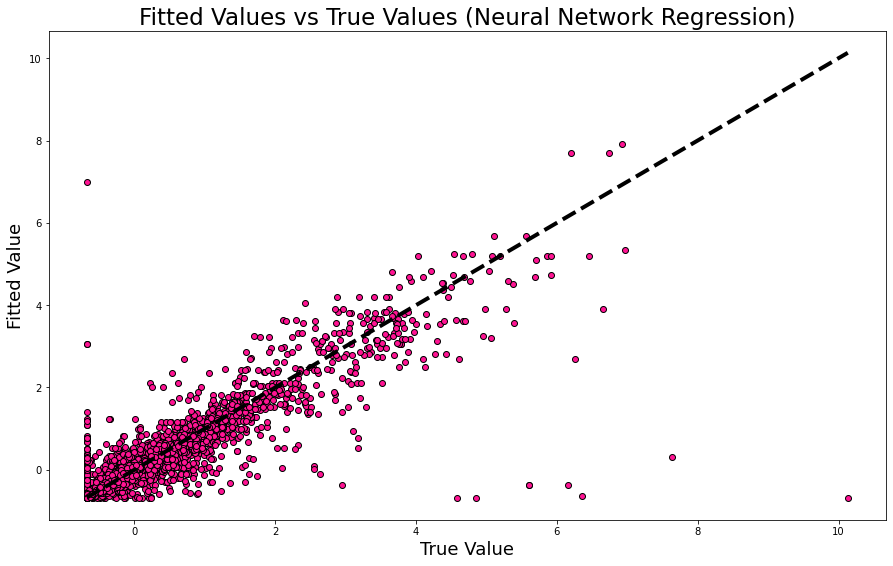

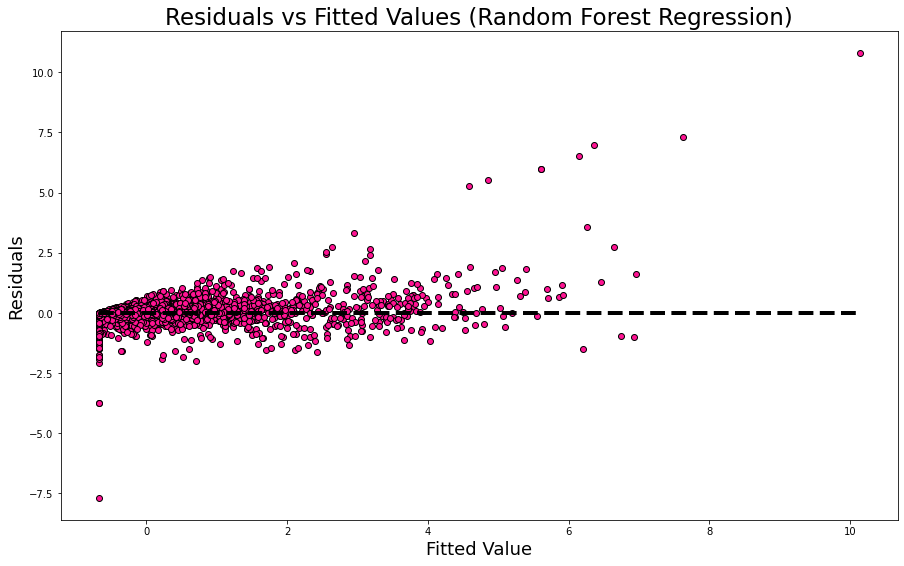

In [ ]:
random_forest_model(X_suicide, y_suicide)

In [ ]:
from IPython.display import Image
# visualize the random forest
forest2 =  RandomForestRegressor(oob_score=True, n_estimators=100,max_features=3,max_depth=4,random_state=42)

forest2.fit(X_suicide, y_suicide)
tree2 = forest2.estimators_[1]
dot_data = export_graphviz(tree2, out_file=None, feature_names= X_suicide.columns.values, 
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest2.png', view=True)
#Image(filename = 'random_forest2.png')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 110, 'max_features': 2, 'n_estimators': 300}
Train RMSE: 0.7524267113160086
Test RMSE: 0.8070774874763595
Out of Bag error: -0.012881158023863915
The R^2 value is  -0.862434906043313


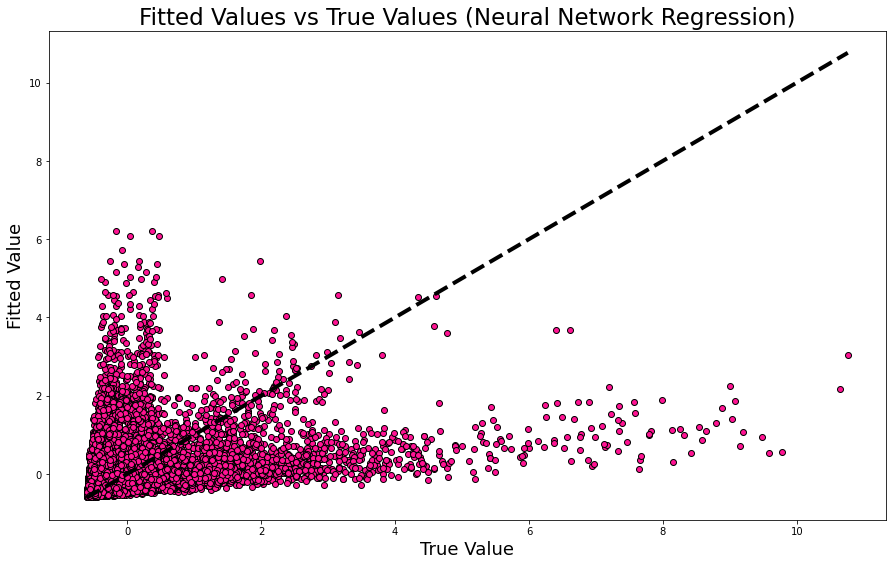

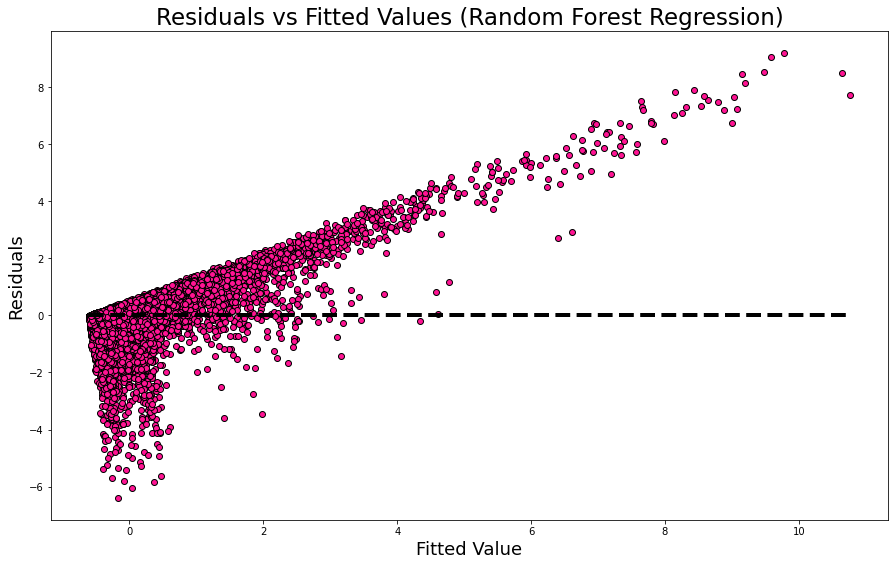

In [ ]:
random_forest_model(X_video, y_video)

In [ ]:
# visualize the random forest
forest3 =  RandomForestRegressor(oob_score=True, n_estimators=1000,max_features=3,max_depth=4,random_state=42)

forest3.fit(X_video, y_video)
tree3 = forest3.estimators_[1]
dot_data = export_graphviz(tree3, out_file=None, feature_names= X_video.columns.values, 
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest3.png', view=True)
#Image(filename = 'random_forest3.png)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
!pip install lightgbm
!pip install scikit-optimize
!pip install catboost

     |████████████████████████████████| 102kB 4.0MB/s 
     |████████████████████████████████| 65.7MB 61kB/s 


In [6]:
import lightgbm as lgb
import catboost
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_bike, y_bike)

In [24]:
lgb_regressor = lgb.LGBMRegressor()
cat_regressor = catboost.CatBoostRegressor(objective='RMSE', verbose=False)
optLGB = BayesSearchCV(lgb_regressor, 
                       {'num_leaves': (2, 100),
                        'n_estimators': (1, 100),
                        'max_depth': (1, 10),
                        'reg_lambda': (1e-3, 1e3)},
                       optimizer_kwargs={'base_estimator': 'RF'},
                       scoring='neg_root_mean_squared_error')

optCAT = BayesSearchCV(cat_regressor,
                       {'iterations': (1, 100),
                        'depth': (1, 10),
                        'l2_leaf_reg': (1e-3, 1e3)},
                       optimizer_kwargs={'base_estimator': 'RF'},
                       scoring='neg_root_mean_squared_error')

In [25]:
optLGB.fit(X_train, y_train)

BayesSearchCV(cv=None, error_score='raise',
              estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, sil...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs={'base_estimator': 'RF'},
     

In [26]:
optCAT.fit(X_train, y_train)

BayesSearchCV(cv=None, error_score='raise',
              estimator=<catboost.core.CatBoostRegressor object at 0x7fbfc9e00650>,
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs={'base_estimator': 'RF'},
              pre_dispatch='2*n_jobs', random_state=None, refit=True,
              return_train_score=False, scoring='neg_root_mean_squared_error',
              search_spaces={'depth': (1, 10), 'iterations': (1, 100),
                             'l2_leaf_reg': (0.001, 1000.0)},
              verbose=0)

In [53]:
print(optLGB.best_params_)
print(optCAT.best_params_)

OrderedDict([('max_depth', 3), ('n_estimators', 89), ('num_leaves', 18), ('reg_lambda', 7.294704706901129)])
OrderedDict([('depth', 8), ('iterations', 64), ('l2_leaf_reg', 1.829001474357801)])


In [28]:
print('LightBGM Best Score %s' % -optLGB.best_score_)
print('CatBoost Best Score %s' % -optCAT.best_score_)

LightBGM Best Score 0.402090567109844
CatBoost Best Score 0.44951334079259664


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

In [6]:
def print_scores(scores):
  for score in scores:
    print('Average Train Score: %s' % -np.mean(score['train_score']))
    print('Average Test Score: %s' % -np.mean(score['test_score']))

In [6]:
datasets = [(X_bike, y_bike), (X_suicide, y_suicide), (X_video, y_video)]

In [65]:
linear = LinearRegression()
scores = []
for X, y in datasets:
  scores.append(cross_validate(linear, X, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

In [66]:
print_scores(scores)

Average Train Score: 0.4679497183718856
Average Test Score: 0.5020404975816651
Average Train Score: 0.8939885156458521
Average Test Score: 0.886760519452195
Average Train Score: 0.8164504087344966
Average Test Score: 0.8158773907242777


In [74]:
scores = []
alphas = [0.02, 0, 0.01]
for dataset, alpha in zip(datasets, alphas):
  X, y = dataset
  lasso = Lasso(alpha=alpha)
  scores.append(cross_validate(lasso, X, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10246.05604849762, tolerance: 2.581325119973239
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-

In [75]:
print_scores(scores)

Average Train Score: 0.4694576280291208
Average Test Score: 0.4988821746711677
Average Train Score: 0.8939885156458521
Average Test Score: 0.886760519452195
Average Train Score: 0.8167769945389253
Average Test Score: 0.8156691029219407


In [70]:
scores = []
alphas = [36, .99, 350]
for dataset, alpha in zip(datasets, alphas):
  X, y = dataset
  ridge = Ridge(alpha=alpha)
  scores.append(cross_validate(ridge, X, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

In [71]:
print_scores(scores)

Average Train Score: 0.46957586445591576
Average Test Score: 0.49452772983551485
Average Train Score: 0.8939885158384617
Average Test Score: 0.8867599279489825
Average Train Score: 0.8166601581255776
Average Test Score: 0.8159528321088736


In [76]:
ridge = Ridge()
scores = []
for X, y in datasets:
  X_poly = np.asarray(PolynomialFeatures(degree=2).fit_transform(X))
  scores.append(cross_validate(ridge, X_poly, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

In [78]:
print_scores(scores)

Average Train Score: 0.3952005915475247
Average Test Score: 0.4847494949429735
Average Train Score: 0.8519159332146738
Average Test Score: 0.8527760782296852
Average Train Score: 0.7819652400364586
Average Test Score: 0.7831153967454562


In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 100, 50), activation='relu', alpha=0.001)
scores = []
for X, y in datasets:
  scores.append(cross_validate(mlp, X, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
print_scores(scores)

Average Train Score: 0.3207961486964466
Average Test Score: 0.43007236650375785
Average Train Score: 0.7071869633271416
Average Test Score: 0.9323295107469691
Average Train Score: 0.7708958191891458
Average Test Score: 0.7749545539556107


In [7]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=90, max_features=3)
scores = []

In [56]:
scores.append(cross_validate(rf, X_bike, y_bike, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True, return_estimator=True))

In [59]:
print('Average Train Score: %s' % -np.mean(scores[0]['train_score']))
print('Average Test Score: %s' % -np.mean(scores[0]['test_score']))
print('Average OOB Score %s' %np.mean([est.oob_score_ for est in scores[0]['estimator']]))

Average Train Score: 0.1496640555997908
Average Test Score: 0.4776114499568808
Average OOB Score 0.8313653905922951


In [60]:
scores.append(cross_validate(rf, X_suicide, y_suicide, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True, return_estimator=True))

In [61]:
print('Average Train Score: %s' % -np.mean(scores[1]['train_score']))
print('Average Test Score: %s' % -np.mean(scores[1]['test_score']))
print('Average OOB Score %s' %np.mean([est.oob_score_ for est in scores[1]['estimator']]))

Average Train Score: 0.3149854950497515
Average Test Score: 1.021083657654696
Average OOB Score 0.8735953327799262


In [8]:
scores.append(cross_validate(rf, X_video, y_video, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True))

In [9]:
print('Average Train Score: %s' % -np.mean(scores[0]['train_score']))
print('Average Test Score: %s' % -np.mean(scores[0]['test_score']))
print('Average OOB Score %s' %np.mean([est.oob_score_ for est in scores[0]['estimator']]))

Average Train Score: 0.7512692974611144
Average Test Score: 0.7991219453546526


KeyError: ignored

In [ ]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=90, max_features=3, oob_score=True)
scores = []
for X, y in datasets:
  scores.append(cross_validate(rf, X, y, scoring='neg_root_mean_squared_error', cv=10, return_train_score=True, return_estimator=True))

In [ ]:
for score in scores:
  print('Average Train Score: %s' % -np.mean(score['train_score']))
  print('Average Test Score: %s' % -np.mean(score['test_score']))
  print('Average OOB Score %s' %np.mean([est.oob_score_ for est in score['estimator']]))